In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import copy
import sys
%matplotlib inline

# 2A: Preparation
Eerst data inlezen:

In [12]:
titanic = pd.read_csv('train.csv', sep=',')
tit_copy = titanic.copy()
tit_copy.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Vanden Steen, Mr. Leo Peter",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Attributes: *ID, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked*

Nu kijken welke datatypes het zijn:

In [13]:
int_columns = list(tit_copy.columns[tit_copy.dtypes == 'int64'])
float_columns = list(tit_copy.columns[tit_copy.dtypes == 'float64'])
string_columns = list(tit_copy.columns[tit_copy.dtypes == 'object'])

print(f"Integer columns: {int_columns}")
print(f"Float columns: {float_columns}")
print(f"String columns: {string_columns}")

Integer columns: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']
Float columns: ['Age', 'Fare']
String columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


Kijken voor de kolommen hoe de kolommen eruit zien:

In [14]:
# Eerst de integer kolommen

tit_copy['PassengerId'] # Gewoon ID's, hebben we waarschijnlijk niet heel veel aan

tit_copy['Survived'] # Of ze het overleefd hebben; binair;  uitkomst variabele;  0=nee, 1=ja   
tit_copy['Survived'].value_counts() # 38% (342) heeft het overleefd

tit_copy['Pclass'] # Klasse waarin ze reisden; ordinaal;  1=eerste,2=tweede,3=derde
tit_copy['Pclass'].value_counts() # 3: 491,  2: 216,  1: 184

tit_copy['SibSp'] # Aantal broertjes/partners aan boord;  discreet
tit_copy['SibSp'].value_counts() # 0: 608,  1: 209,  2: 28,  3: 16,  4: 18,  5: 5,  8: 7

tit_copy['Parch'] # Aantal ouders/kinderen aan boord;  discreet
tit_copy['Parch'].value_counts() #0: 678,  1: 118,  2: 80,  3: 5,  4: 4,  5: 5,  6: 1

# Nu de float kolommen

tit_copy['Age'] # Leeftijd;    continue;
tit_copy['Age'].isnull().sum() # 177 NA's
np.mean(tit_copy['Age']) # Gemiddelde leeftijd = 29.7
np.std(tit_copy['Age']) # Met een std van 14.5

tit_copy['Fare'] # Passenger fare?    continue
np.mean(tit_copy['Fare']) # Gemiddelde fare van 32.2
np.std(tit_copy['Fare']) # Met een std van 49.6

# Nu de string kolommen

tit_copy['Name'] # Namen, hebben we niet heel veel aan waarschijnlijk

tit_copy['Sex'] # Geslacht; male=man, female=vrouw
tit_copy['Sex'].value_counts()  # 577 mannen,   314 vrouwen

tit_copy['Ticket'] # Ticket nummer, lijkt me ook niet relevant

tit_copy['Cabin'] # Hun cabine nummer, heel veel NA's
tit_copy['Cabin'].isnull().sum() # 687/891 NA's

tit_copy['Embarked'] # Waar ze opgestapt zijn;  C = Cherbourg, Q = Queenstown, S = Southampton
tit_copy['Embarked'].value_counts(dropna=False) # S: 644,  C: 168,  Q: 77    2 NA's

print(tit_copy.isnull().sum()) # Age heeft 177 NA's en Cabin 687, Embarked 2

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Eerst wat descriptive plots van de continue variabelen:

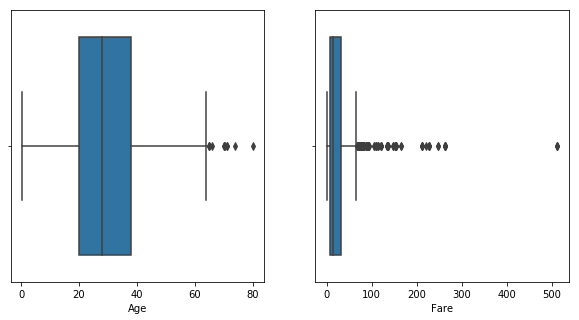

In [15]:
f, _ = plt.subplots(2, 2, figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(tit_copy['Age'])
plt.subplot(1,2,2)
sns.boxplot(tit_copy['Fare']) # Een outlier op rechts

Er is één grote outlier bij Fare waar waarschijnlijk iets mee gedaan moet worden. Moeten we ook iets met de rest doen? En er zijn bij Age en Fare blijkbaar 0-values. Zijn dit pasgeboren baby's en mensen die gratis reisden of zijn dit ook missing value's?

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


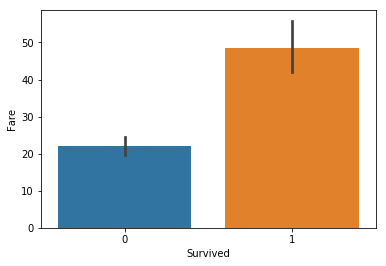

In [16]:
sns.barplot(tit_copy['Survived'], tit_copy['Fare'])

Aan dit plotje te zien is de gemiddelde Fare bij overlevenden groter dan bij niet-overlevenden. Komt dit doordat ze in een betere klasse zaten of door de outlier of is er een andere reden?

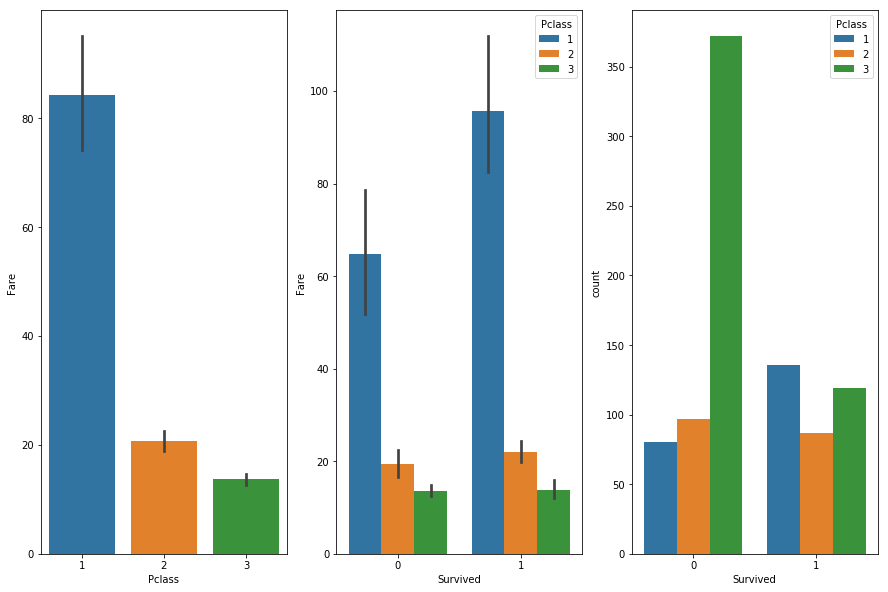

In [75]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
sns.barplot(tit_copy['Pclass'], tit_copy['Fare'])
plt.subplot(1,3,2)
sns.barplot(tit_copy['Survived'], tit_copy['Fare'], tit_copy['Pclass'])
plt.subplot(1,3,3)
sns.countplot(tit_copy['Survived'], hue=tit_copy['Pclass'])

De Fare van de eerste klasse was significant veel hoger. Er is ook een significant verschil qua prijs tussen de mensen die het wel overleefd hebben en 1e klasse reisden vs de mensen die het niet overleefd hebben en 1e klas reisden. Kregen de mensen die veel geld betaalden voorrang? De mensen die het niet overleefd hebben kwamen voornamelijk uit de 3e klasse. Wijst er ook op dat dat een factor kan zijn

Kijken hoe de leeftijd en het geslacht verdeeld is onder de overlevenden:

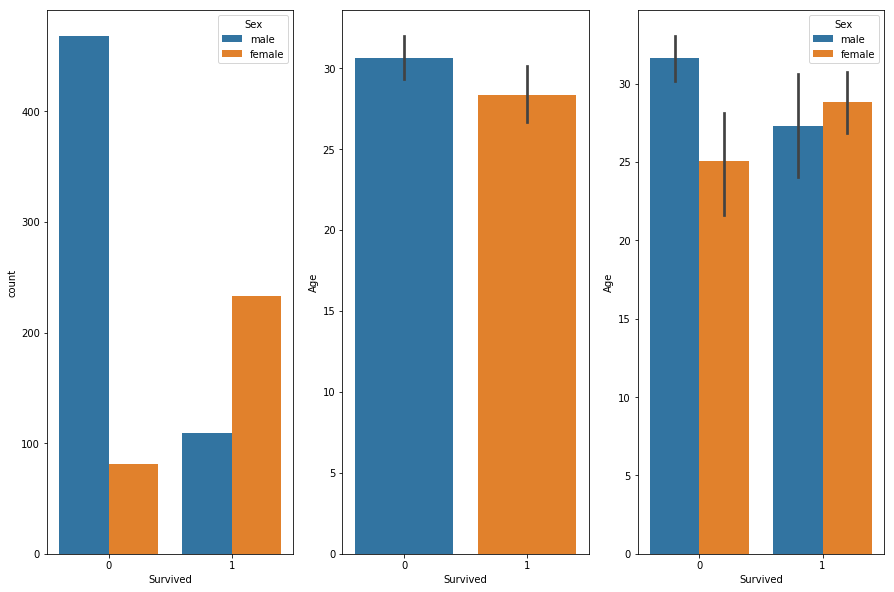

In [18]:
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
sns.countplot(tit_copy['Survived'], hue=titanic['Sex']) # Veel meer mannen die het niet overleefd hebben
plt.subplot(1,3,2)
sns.barplot(tit_copy['Survived'], titanic['Age']) # Bij leeftijd niet echt een verschil te zien
plt.subplot(1,3,3)
sns.barplot(tit_copy['Survived'], titanic['Age'], titanic['Sex']) # Gem leeftijd van overleden mannen is hoger dan overleden vrouwen.

Er zijn veel meer mannen dan vrouwen overleden. Ook zijn er veel meer vrouwen dan mannen die het wel hebben overleefd. Bij de gemiddelde leeftijs is geen groot verschil te zien, behalve als je gaat filteren op geslacht. De gemiddelde leeftijd van overleden mannen is groter dan van overleden vrouwen. De leeftijd van overlevende mannen/vrouwen is ong gelijk

Kijken hoe het aantal familieleden/partners verdeeld is:

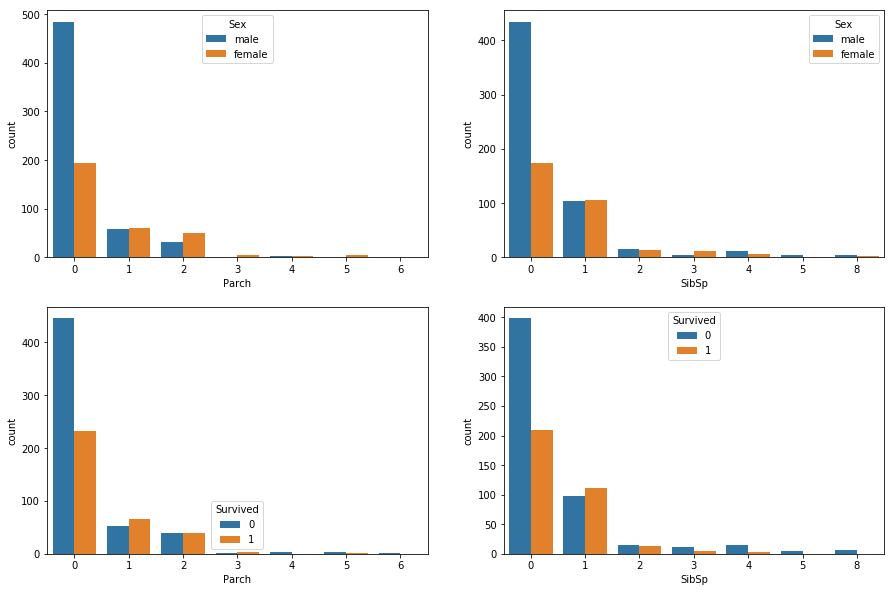

In [19]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.countplot(tit_copy['Parch'], hue=tit_copy['Sex']) # Meer mannen dan vrouwen zonder ouders/kinderen
plt.subplot(2,2,2)
sns.countplot(tit_copy['SibSp'], hue=tit_copy['Sex']) # Meer mannen dan vrouwen zonder broers
plt.subplot(2,2,3)
sns.countplot(tit_copy['Parch'], hue=tit_copy['Survived']) # Dus ook veel mensen zonder familie die gestorven zijn
plt.subplot(2,2,4)
sns.countplot(tit_copy['SibSp'], hue=tit_copy['Survived']) # Is logisch want meer mannen overleden en meer mannen alleen -> meer mensen alleen overleden

Er zijn veel meer mannen die geen ouders/kinderen of broers/geliefdes hebben dan vrouwen. Bij mensen die wel familie hebben is de man-vrouw verdeling 50-50. Dit geldt ook voor de verdeling van overlevenden onder de mensen: De verhouding van mensen die niet overleden tegenover wel overleden is veel groter bij mensen zonder familie dan bij mensen met.

Kijken naar Embarked:

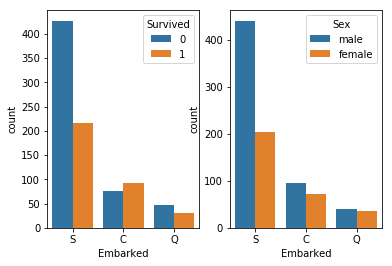

In [20]:
sns.countplot(tit_copy['Embarked']) # Meeste komen uit Southampton
plt.subplot(1,2,1)
sns.countplot(tit_copy['Embarked'], hue=tit_copy['Survived']) # Meer mensen uit Southampton niet dan wel overleefd
plt.subplot(1,2,2)
sns.countplot(tit_copy['Embarked'], hue=tit_copy['Sex']) # Waren ook veel meer mannen uit Southampton

Ong 2/3 van de mensen die in Southampton zijn opgestapt zijn overleden. Dit komt ong overeen met de man/vrouw verhouding. Voor Cherbourg zijn deze verhoudingen een beetje omgedraaid, maar het is de vraag of dit significant is. Voor Queenstown is het ongeveer hetzelfde

Kijken naar Pclass:

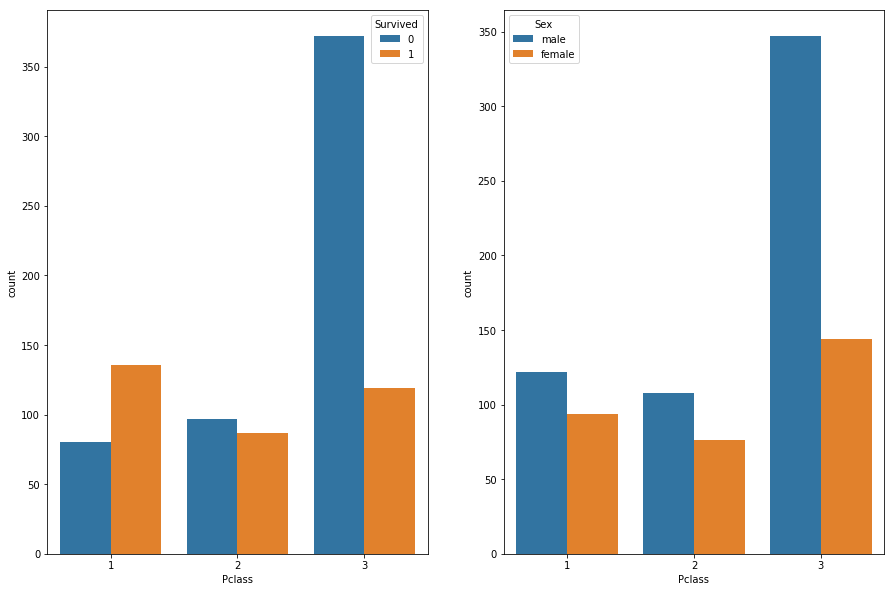

In [21]:
# sns.countplot(tit_copy['Pclass'])  # Veel meer mensen derde klasse
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(tit_copy['Pclass'], hue=tit_copy['Survived']) # In derde klasse veel meer mensen niet overleefd, in 1e klasse wel
plt.subplot(1,2,2)
sns.countplot(tit_copy['Pclass'], hue=tit_copy['Sex']) # Veel meer mannen in derde klasse, ook wat meer in eerste klasse wel

De verdeling van het aantal overledenen in de derde klasse komt overeen met de verdeling man/vrouw. De verdeling overlevenden in de eerste klasse is wat omgekeerd: meer overlevenden in de eerste klasse, maar ook meer mannen in eerste klasse. Zou erop kunnen wijzen dat de klasse waarin je reist ook gecorreleerd is met de  overlevingskans?

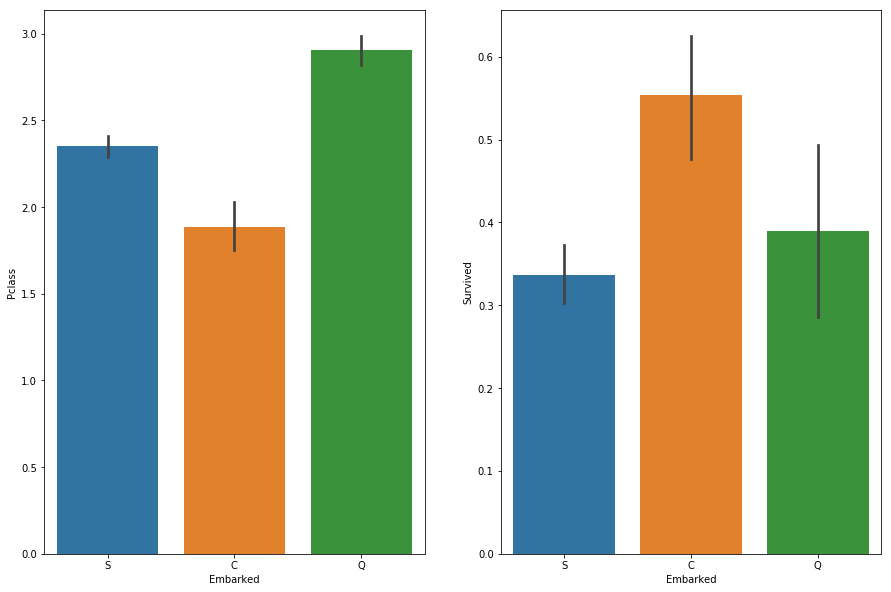

In [22]:
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
sns.barplot(tit_copy['Embarked'], tit_copy['Pclass'])
plt.subplot(1,2,2)
sns.barplot(tit_copy['Embarked'], tit_copy['Survived'])

Mensen uit Cherbourg zaten gemiddeld genomen in de beste klasse en daarvan heeft het hoogste percentage het overleefd

#### Remove NA's for age and embarked:

Voor Embarked: gewoon de waarde van de persoon ervoor gebruiken. Het zijn maar 2 NA's, dus zou niet zoveel uit moeten maken als je bedenkt dat er 891 personen en drie stations zijn.

In [23]:
tit_copy['Embarked'].isnull().sum()
tit_copy['Embarked'].fillna(method='ffill', inplace=True)

Voor Age: mean van mannen en vrouwen gebruiken en die voor hun respectievelijke NA's geruiken

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


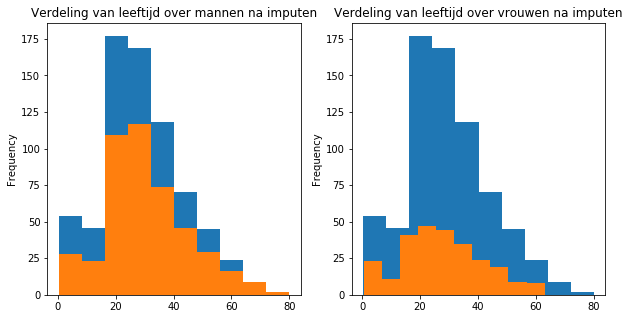

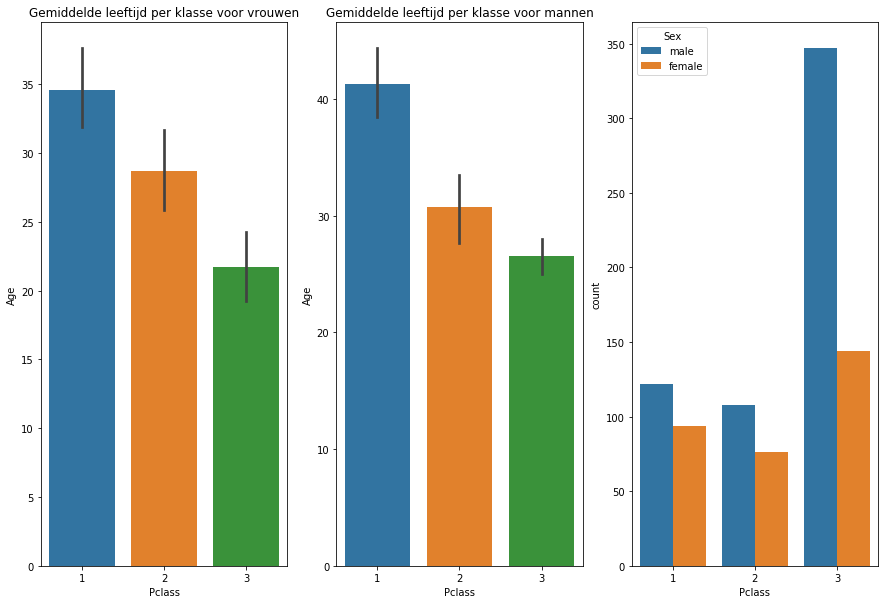

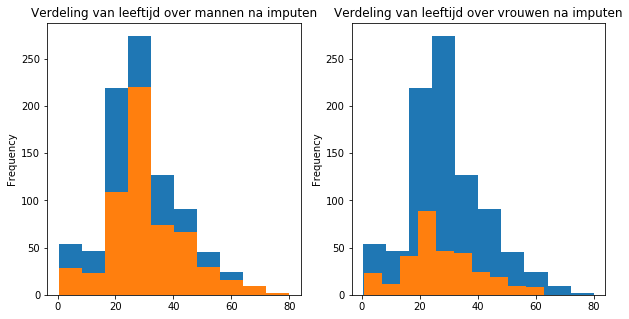

In [163]:
tit_copy.Age = titanic['Age']
# Mannen en vrouwen onderscheiden
male = tit_copy[tit_copy['Sex'] == 'male']
female = tit_copy[tit_copy['Sex'] == 'female']

# Mannen en vrouwen over het totaal plotten
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("Verdeling van leeftijd over mannen na imputen")
tit_copy.Age.plot('hist')
male.Age.plot('hist')
plt.subplot(1,2,2)
plt.title("Verdeling van leeftijd over vrouwen na imputen")
tit_copy.Age.plot('hist')
female.Age.plot('hist')

male.Age.mean(), female.Age.mean() # Gemiddelde leeftijd van mannen is hoger dan van vrouwen

plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.title("Gemiddelde leeftijd per klasse voor vrouwen")
sns.barplot(female['Pclass'], female['Age'])
plt.subplot(1,3,2)
plt.title("Gemiddelde leeftijd per klasse voor mannen")
sns.barplot(male['Pclass'], male['Age'])   # Leeftijd en klasse correleren ook met elkaar
plt.subplot(1,3,3)
sns.countplot(tit_copy['Pclass'], hue=tit_copy['Sex']) # Ook meer mannen in derde klasse

m_c1 = (tit_copy.Sex == 'male') & (tit_copy.Pclass == 1)
m_c2 = (tit_copy.Sex == 'male') & (tit_copy.Pclass == 2)
m_c3 = (tit_copy.Sex == 'male') & (tit_copy.Pclass == 3)
f_c1 = (tit_copy.Sex == 'female') & (tit_copy.Pclass == 1)
f_c2 = (tit_copy.Sex == 'female') & (tit_copy.Pclass == 2)
f_c3 = (tit_copy.Sex == 'female') & (tit_copy.Pclass == 3)

tit_copy.loc[m_c1, 'Age'] = tit_copy.loc[m_c1, 'Age'].fillna(tit_copy.loc[m_c1, 'Age'].mean())
tit_copy.loc[m_c2, 'Age'] = tit_copy.loc[m_c2, 'Age'].fillna(tit_copy.loc[m_c2, 'Age'].mean())
tit_copy.loc[m_c3, 'Age'] = tit_copy.loc[m_c3, 'Age'].fillna(tit_copy.loc[m_c3, 'Age'].mean())
tit_copy.loc[f_c1, 'Age'] = tit_copy.loc[f_c1, 'Age'].fillna(tit_copy.loc[f_c1, 'Age'].mean())
tit_copy.loc[f_c2, 'Age'] = tit_copy.loc[f_c2, 'Age'].fillna(tit_copy.loc[f_c2, 'Age'].mean())
tit_copy.loc[f_c3, 'Age'] = tit_copy.loc[f_c3, 'Age'].fillna(tit_copy.loc[f_c3, 'Age'].mean())

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("Verdeling van leeftijd over mannen na imputen")
tit_copy.Age.plot('hist')
tit_copy.loc[tit_copy.Sex == 'male', 'Age'].plot('hist')
plt.subplot(1,2,2)
plt.title("Verdeling van leeftijd over vrouwen na imputen")
tit_copy.Age.plot('hist')
tit_copy.loc[tit_copy.Sex == 'female', 'Age'].plot('hist')